[12:45:36] Molecule does not have explicit Hs. Consider calling AddHs()
1000it [03:53,  4.29it/s]


[<rdkit.Chem.rdchem.Mol object at 0x13977f990>, <rdkit.Chem.rdchem.Mol object at 0x13977f920>, <rdkit.Chem.rdchem.Mol object at 0x13977f8b0>]


[12:49:30] Initializing MetalDisconnector
[12:49:30] Running MetalDisconnector
[12:49:30] Initializing Normalizer
[12:49:30] Running Normalizer
[12:49:30] Running LargestFragmentChooser
[12:49:30] Running Normalizer
[12:49:30] Running Uncharger
[12:49:30] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 20
[12:49:30] Initializing MetalDisconnector
[12:49:30] Running MetalDisconnector
[12:49:30] Initializing Normalizer
[12:49:30] Running Normalizer
[12:49:30] Running LargestFragmentChooser
[12:49:30] Running Normalizer
[12:49:30] Running Uncharger
[12:49:30] Initializing MetalDisconnector
[12:49:30] Running MetalDisconnector
[12:49:30] Initializing Normalizer
[12:49:30] Running Normalizer
[12:49:30] Running LargestFragmentChooser
[12:49:30] Running Normalizer
[12:49:30] Running Uncharger


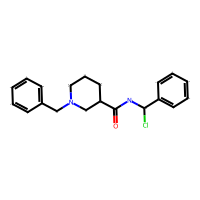

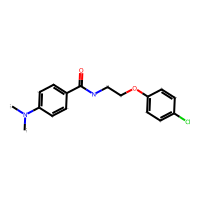

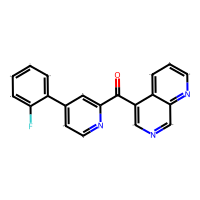

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [9]:
import py3Dmol

from ml_conformer_generator import MLConformerGenerator
from cheminformatics import evaluate_samples
from rdkit import Chem
from rdkit.Chem import rdDistGeom

from rdkit.Chem import Draw


device = "cpu"
generator = MLConformerGenerator(device=device)


ref_mol = Chem.MolFromSmiles("CCc1noc(C)c1C(=O)NNC(=O)COc1ccccc1C")
rdDistGeom.EmbedMolecule(ref_mol, forceTol=0.001, randomSeed=12)

samples = generator.generate_conformers(reference_conformer=ref_mol, n_samples=4)
print(samples)

for sample in samples:
    smi = Chem.MolFromSmiles(Chem.MolToSmiles(sample))
    img = Draw.MolToImage(smi, size=(200, 200))
    display(img)
    
_, std_samples = evaluate_samples(ref_mol, samples)

view = py3Dmol.view(width=400, height=300, viewergrid=(2,2))

for sample in std_samples:
    view.addModel(sample['mol_block'], 'mol')
    view.setStyle({'stick': {}})
    view.zoomTo()

view.show()